In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
N = 50
x_start, x_end = -2.0, 2.0
y_start, y_end = -1.0, 1.0
x = numpy.linspace(x_start, x_end, N)
y = numpy.linspace(y_start, y_end, N)
X, Y = numpy.meshgrid(x, y)

In [3]:
kappa = 1.0
x_doublet, y_doublet = 0.0, 0.0
u_inf = 1.0

In [4]:
import geneq

In [5]:
u_doub, v_doub = geneq.vel_doub(kappa, x_doublet, y_doublet, X, Y)

psi_doub = geneq.stream_func_doub(kappa, x_doublet, y_doublet, X, Y)

u_free = u_inf * numpy.ones((N,N), dtype=float)
v_free = numpy.zeros((N,N), dtype=float)

psi_free = u_inf * Y

u = u_doub + u_free
v = v_doub + v_free
psi = psi_doub + psi_free

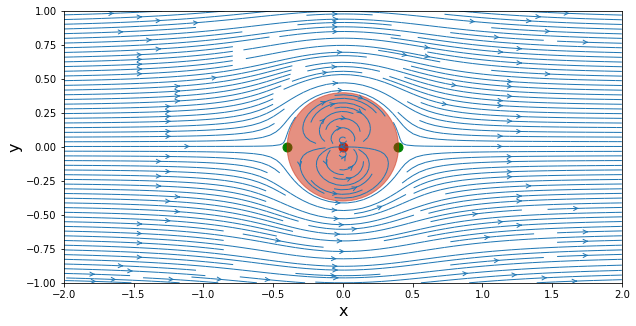

In [6]:
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width,height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o')

R = numpy.sqrt(kappa / (2 * numpy.pi * u_inf))
circle = pyplot.Circle((0,0), radius=R, color='#CD2305', alpha=0.5)
pyplot.gca().add_patch(circle)

x_stagn1, y_stagn1 = +numpy.sqrt(kappa / (2 * numpy.pi * u_inf)), 0.0
x_stagn2, y_stagn2 = -numpy.sqrt(kappa / (2 * numpy.pi * u_inf)), 0.0
pyplot.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2], color='g', s=80, marker='o');

In [123]:
gamma = 4.0
#5.013256 gamma right before stagnation detaches
x_vortex, y_vortex = 0.0, 0.0

In [124]:
u_vor, v_vor = geneq.vel_vor(gamma, x_vortex, y_vortex, X, Y)
psi_vor = geneq.stream_func_vor(gamma, x_vortex, y_vortex, X, Y)

In [125]:
u = u_free + u_doub + u_vor
v = v_free + v_doub + v_vor
psi = psi_free + psi_doub + psi_vor

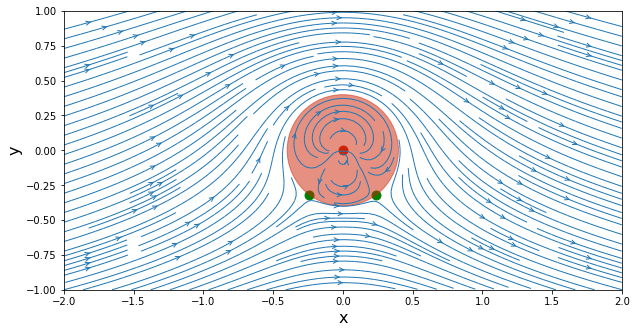

In [126]:
pyplot.figure(figsize=(10.0,10.0))
pyplot.axis('scaled',adjustable='box')
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o')

R = numpy.sqrt(kappa / (2 * numpy.pi * u_inf))
circle = pyplot.Circle((0.0,0.0), radius=R, color='#CD2305', alpha=0.5)
pyplot.gca().add_patch(circle)

x_stagn1, y_stagn1 = (+numpy.sqrt(R**2 - (gamma / (4 * numpy.pi * u_inf))**2),
                      -gamma / (4 * numpy.pi * u_inf))
x_stagn2, y_stagn2 = (-numpy.sqrt(R**2 - (gamma / (4 * numpy.pi * u_inf))**2),
                      -gamma / (4 * numpy.pi * u_inf))
pyplot.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2], color='g', s=80, marker='o');

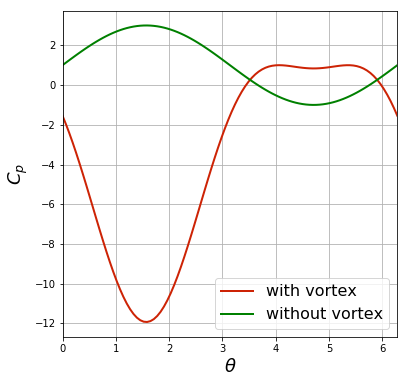

In [128]:
theta = numpy.linspace(0.0, 2 * numpy.pi, 100)
u_theta = -2 * u_inf * numpy.sin(theta) - gamma / (2 * numpy.pi * R)

cp = 1.0 - (u_theta / u_inf)**2

u_theta_no_vortex = -2 * u_inf * numpy.sin(theta)
cp_no_vortex = 1.0 - (u_theta_no_vortex / u_inf**2)

size = 6
pyplot.figure(figsize=(size, size))
pyplot.grid(True)
pyplot.xlabel(r'$\theta$', fontsize=18)
pyplot.ylabel('$C_p$', fontsize=18)
pyplot.xlim(theta.min(), theta.max())
pyplot.plot(theta, cp,
            label='with vortex', color='#CD2305', linewidth=2, linestyle='-')
pyplot.plot(theta, cp_no_vortex,
            label='without vortex', color='g', linewidth=2, linestyle='-')
pyplot.legend(loc='best', prop={'size':16});